Optimal number of features : 34


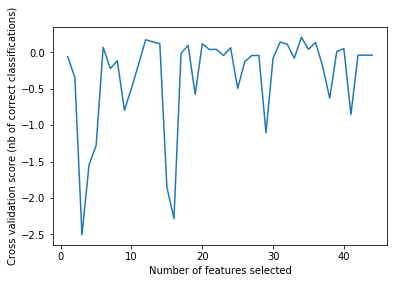

peak memory: 2742.57 MiB, increment: 1780.06 MiB
CPU times: user 1d 1h 45min 18s, sys: 1h 52min 39s, total: 1d 3h 37min 58s
Wall time: 1h 38min 14s


In [11]:
%%time
%%memit

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV


# Create the RFE object and compute a cross-validated score.
xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)

# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=xgb_model, 
              step=1, 
              cv=2,
              scoring='r2',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
plt.show()

In [13]:
!ls /home/547/sg4953/notebooks

'Bayesian Search.ipynb'  'Grid Search.ipynb'	 'Testing F-Rank.ipynb'
'Feature Ranking.ipynb'  'Pre Processing.ipynb'   dask-worker-space


In [9]:
headers = next(csv.reader(open(input_dataset_path)))
pprint(headers)

['target',
 '/g/data/ge3/sheece/LOC_distance_to_coast.tif',
 '/g/data/ge3/sheece/mrvbf_9.tif',
 '/g/data/ge3/sheece/relief_mrvbf_3s_mosaic.tif',
 '/g/data/ge3/sheece/relief_elev_focalrange1000m_3s.tif',
 '/g/data/ge3/sheece/relief_elev_focalrange300m_3s.tif',
 '/g/data/ge3/sheece/saga_wetSM_85_resampled.tif',
 '/g/data/ge3/sheece/tpi_300.tif',
 '/g/data/ge3/sheece/slope_fill2.tif',
 '/g/data/ge3/sheece/dem_fill.tif',
 '/g/data/ge3/sheece/3dem_mag2.tif',
 '/g/data/ge3/sheece/3dem_mag1_fin.tif',
 '/g/data/ge3/sheece/3dem_mag0.fin.tif',
 '/g/data/ge3/sheece/relief_roughness.tif',
 '/g/data/ge3/sheece/LATITUDE_GRID1_clip.tif',
 '/g/data/ge3/sheece/LATITUDE_GRID1_clip.tif',
 '/g/data/ge3/sheece/Dose_2016.tif',
 '/g/data/ge3/sheece/Potassium_2016.tif',
 '/g/data/ge3/sheece/Thorium_2016.tif',
 '/g/data/ge3/sheece/Rad2016U_Th.tif',
 '/g/data/ge3/sheece/Rad2016K_Th.tif',
 '/g/data/ge3/sheece/national_Wii_RF_multirandomforest_prediction.tif',
 '/g/data/ge3/sheece/si_geol1.tif',
 '/g/data/ge3/she

In [8]:
X_test.shape, y_test.shape

((161475, 44), (161475,))

In [7]:
X_train.shape, y_train.shape

((327842, 44), (327842,))

In [6]:
X.shape, y.shape

((489317, 44), (489317,))

In [5]:
%%time
%%memit

# read the csv file created
train = np.genfromtxt(input_dataset_path, delimiter=',',skip_header=1)


X, y = train[:, 1:], train[:, :1]
y = y.ravel()

# Set training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

peak memory: 2827.79 MiB, increment: 2665.92 MiB
CPU times: user 18.8 s, sys: 1.66 s, total: 20.5 s
Wall time: 22.3 s


In [4]:
input_dataset_path = Path('/g/data/ge3/sheece/input_dataset_filtered.csv')

In [3]:
%load_ext memory_profiler

In [2]:
import numpy as np
import ray
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tune_sklearn import TuneSearchCV
from xgboost import XGBRegressor
import xgboost as xgb


In [1]:
import csv
import time  # Just to compare fit times
from pathlib import Path
from pprint import pprint
import csv
import multiprocessing